In [1]:
import citipy


In [2]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import requests
import time


#import api keys
import api_keys


#imported pprintfor json
from pprint import pprint

#output file(csv)
output_data_file = 'cities.csv'

lat_range=(-90,90)
lng_range=(-180,180)

In [3]:
#List for holding lat_lngs aand cities
lat_lngs =[]
cities=[]

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs =np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)

#Creates a set of random lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len_cities = len(cities)
len_cities

615

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_keys

#Starting URL for Weather MAp API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
#Lists with values from the for loop
temperature =[]
humidity=[]
cloudy=[]
windspeed=[]
latitude = []
cities_name=[]
#starting the for loop for list values
for city in cities:
    try:
        # building the query 
        query_url = url+ '&q=' + city 
        cityweather = requests.get(query_url).json()
        
        temp = cityweather['main']['temp']
        hum = cityweather['main']['humidity']
        cloud = cityweather['clouds']['all']
        wind=cityweather['wind']['speed']
        lat_data=cityweather['coord']['lat'] 
        city_name = cityweather['name']
        
        temperature.append(temp)
        humidity.append(hum)
        cloudy.append(cloud)
        windspeed.append(wind)
        latitude.append(lat_data)
        cities_name.append(city_name)
    except:
        pass
# Used a try and except incase of any data that was unreadable to continue the program        


In [6]:
#building the data frame with pandas to be able to call data from
weather_df = pd.DataFrame({'temperature':temperature,
                           'humidity':humidity,
                           'cloudy':cloudy,
                           'windspeed':windspeed,
                           'latitude':latitude,
                           'cities':cities_name})
weather_df.head()
weather_df.to_csv('weather_df.csv')

,temperature,humidity,cloudy,windspeed,latitude,cities
0,86.91,87,32,6.76,5.93,Maimbung
1,35.52,97,8,20.51,60.14,Nanortalik
2,69.80,77,90,12.75,35.73,Hasaki
3,66.92,75,90,12.75,39.95,Kodiak
4,37.86,100,88,19.62,73.51,Dikson


From looking at the scatter plot, the results
give us the insight that if the city is located between
0-90 latitude, that you will have a higher temperature.
If the city is located 0-90 then you will have a lower temperature.



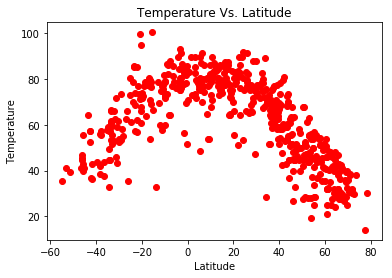

In [7]:
#building plot for temp vs lat
x_axis = weather_df['latitude']
y_axis = weather_df['temperature']
#min and max for x and y axis 
x_min =x_axis.min() -10
y_max =y_axis.max() +10
#titles for graph 
plt.title("Temperature Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Temperature')
#building and printng the graph 
plt.scatter(x_axis,y_axis,marker='o',color='red')

print('''From looking at the scatter plot, the results
give us the insight that if the city is located between
0-90 latitude, that you will have a higher temperature.
If the city is located 0-90 then you will have a lower temperature.
''')
plt.savefig('Homework_files/Tempvslat.png')


    From looking at the scatter plot,'Humidity vs Latitude', 
    we are able to draw the conslsion that most cities between latitudes
    -60 to 80 have a humidity range of60 to 100 percent humidity.



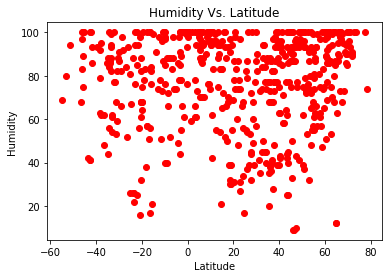

In [8]:
#building plot for humidity vs lat
x_axis = weather_df['latitude']
y_axis = weather_df['humidity']

x_min =x_axis.min() -10
y_max =y_axis.max() +10

plt.title("Humidity Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

plt.scatter(x_axis,y_axis,marker='o',color='red')


print('''
    From looking at the scatter plot,'Humidity vs Latitude', 
    we are able to draw the conslsion that most cities between latitudes
    -60 to 80 have a humidity range of60 to 100 percent humidity.
''')
plt.savefig('Homework_files/hum_lat.png')

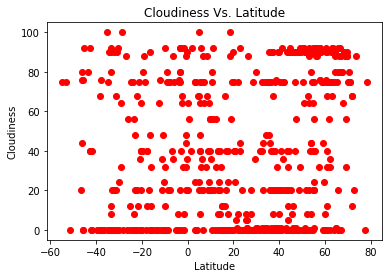

In [9]:
#building plot for cloudy vs lat
x_axis = weather_df['latitude']
y_axis = weather_df['cloudy']

x_min =x_axis.min() -10
y_max =y_axis.max() +10

plt.title("Cloudiness Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')

plt.scatter(x_axis,y_axis,marker='o',color='red')
plt.savefig('Homework_files/Cloudvslat.png')

 From looking at the scatter plot,'Windspeed Vs. Latitude', 
the results show us that cities closer to the latitude degree 
of zero have a lower windspeed, whereas the cities father from 
a zero latitude have a higher windspeed.



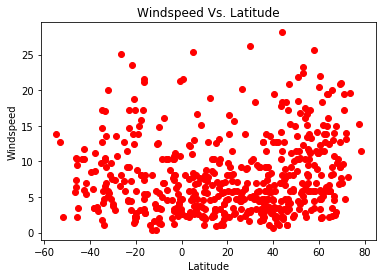

In [10]:
#building plot for windstorm vs lat
x_axis = weather_df['latitude']
y_axis = weather_df['windspeed']

x_min =x_axis.min() -10
y_max =y_axis.max() +10

plt.title("Windspeed Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Windspeed')

plt.scatter(x_axis,y_axis,marker='o',color='red')
print(''' From looking at the scatter plot,'Windspeed Vs. Latitude', 
the results show us that cities closer to the latitude degree 
of zero have a lower windspeed, whereas the cities father from 
a zero latitude have a higher windspeed.
''')
plt.savefig('Homework_files/windspeed.png')

In [11]:
pprint(cityweather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 38.18, 'lon': -1.13},
 'dt': 1538627400,
 'id': 2517679,
 'main': {'humidity': 77,
          'pressure': 1019,
          'temp': 59.9,
          'temp_max': 60.8,
          'temp_min': 59},
 'name': 'Fortuna',
 'sys': {'country': 'ES',
         'id': 5464,
         'message': 0.0047,
         'sunrise': 1538632977,
         'sunset': 1538674970,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1.12}}
